In [1]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt

def generate_uniform_distribution_on_sphere(dimensions=3, points=10000):
    x = np.random.normal(size=(points, dimensions)) 
    x /= np.linalg.norm(x, axis=1)[:, np.newaxis]
    return x

def plot3(a,b,c,mark="o",col="r"):
  from matplotlib import pyplot
  import pylab
  from mpl_toolkits.mplot3d import Axes3D
  pylab.ion()
  fig = pylab.figure()
  ax = Axes3D(fig)
  ax.scatter(a, b, c,marker=mark,color=col)

# Distribution of pairwise distance for 3-dim sphere

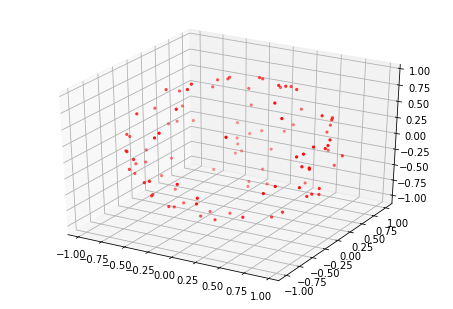

In [2]:
# Generate data
sphere_3 = generate_uniform_distribution_on_sphere(points=100)

# Plot
plot3(sphere_3[:,0], sphere_3[:,1], sphere_3[:,2], '.')

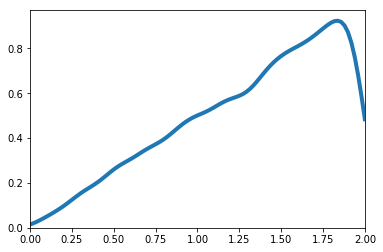

In [3]:
# Calc pairwise distance
def calc_pairwise_distances(sphere):
    distances_all = []
    for point in sphere:
        distances = np.linalg.norm(sphere-point, axis=-1)
        distances = distances[distances > 0]
        if len(distances) != len(sphere) -1:
            print ("ERROR!")
            return
        distances_all.append(distances)
    return np.concatenate(distances_all)
    
distances = calc_pairwise_distances(sphere_3)
seaborn.distplot(distances, hist=False, kde=True,
             kde_kws={'linewidth': 4,
                     'clip': (0.0, 2.0)})
plt.xlim(0, 2)
plt.show()

# Reproducing Figure 2 from Sampling Matters

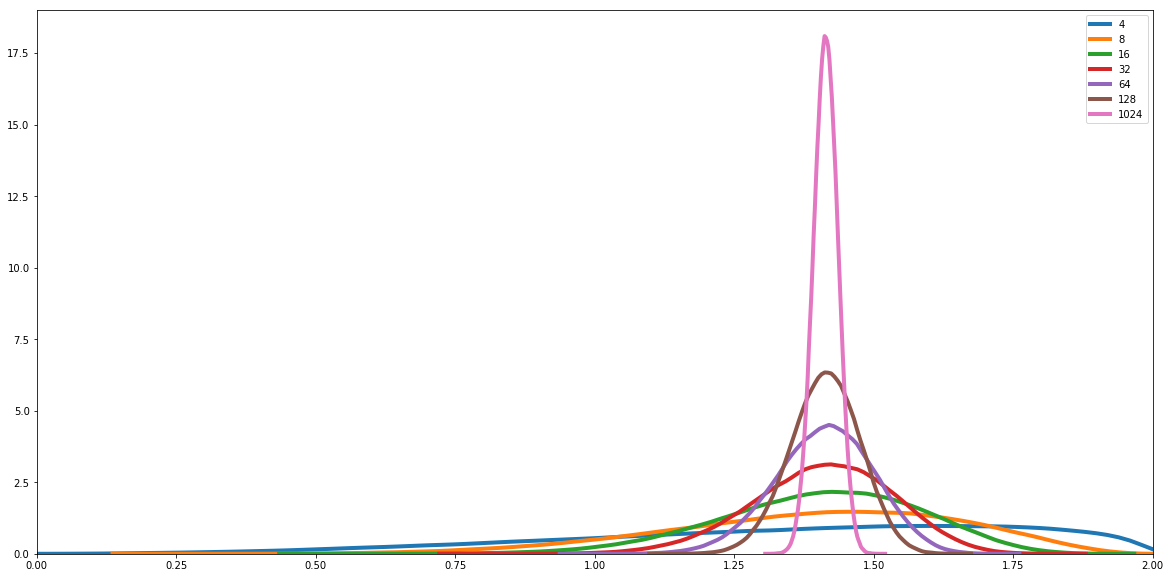

In [4]:
plt.figure(figsize=(20,10))
for dim in [4, 8, 16, 32, 64, 128, 1024]:
    sphere = generate_uniform_distribution_on_sphere(dimensions=dim, points=1000)
    distances = calc_pairwise_distances(sphere)
    seaborn.distplot(distances, hist=False, kde=True,
                     label=dim,
                     kde_kws={'linewidth': 4,
                              'clip': (0.0, 2.0)})
plt.xlim(0, 2)
plt.legend()
plt.show()

# Reproducing Figure 3 from Sampling Matters

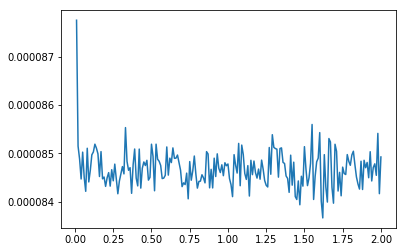

In [125]:
sigma = 0.01
sigma_01 = []
for multiplier in np.linspace(0.01, 2.0, 200):
    
    # han
    han = generate_uniform_distribution_on_sphere(dimensions=128, points=128) * multiplier
    
    # noise
    noise = np.random.normal(loc=0.0, scale=sigma, size=len(han)**2).reshape((len(han), -1))
    eye = np.eye(len(han))
    noise = eye * noise
    
    # Norm of cov matrix
    norm = np.linalg.norm(han + noise, 'nuc')
    direction = (han + noise) / norm
    sigma_01.append(np.linalg.norm(np.cov(direction), 'nuc'))

plt.plot(np.linspace(0.01, 2.0, 200), sigma_01)
plt.show()

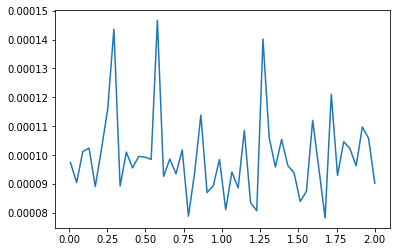

In [135]:
noises = []
sigma = 0.01
for multiplier in np.linspace(0.01, 2.0, 50):
    noise = np.random.normal(loc=0.0, scale=sigma, size=128**2).reshape(128, -1)
    eye = np.eye(128)
    noise = eye * noise
    noises.append(np.linalg.norm(np.cov(noise), 'nuc'))
plt.plot(np.linspace(0.01, 2.0, 50), noises)
plt.show()

# Loss vs pairwise distance

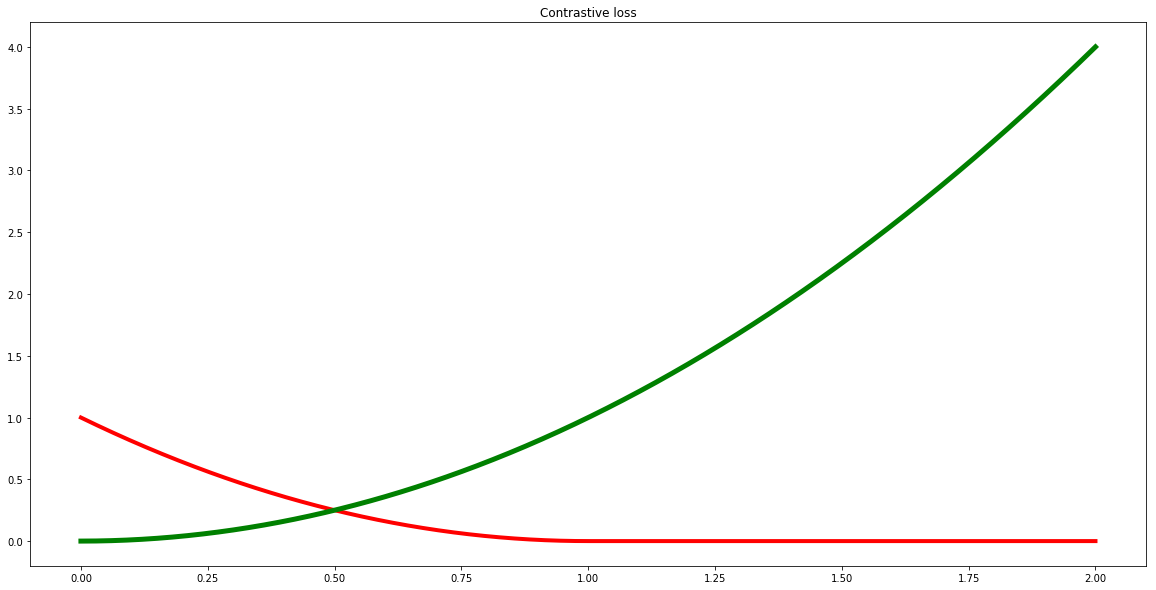

In [7]:
Han = np.linspace(0, 2, 1000)

alpha = 1.0
l_contrastive_neg = [(max(alpha - han, 0))**2 for han in Han]
l_contrastive_pos = [(han)**2 for han in Han]

plt.figure(figsize=(20,10))
plt.plot(Han, l_contrastive_neg, linewidth=4.0, color='red')
plt.plot(Han, l_contrastive_pos, linewidth=5.0, color='green')
plt.title('Contrastive loss')
plt.show()

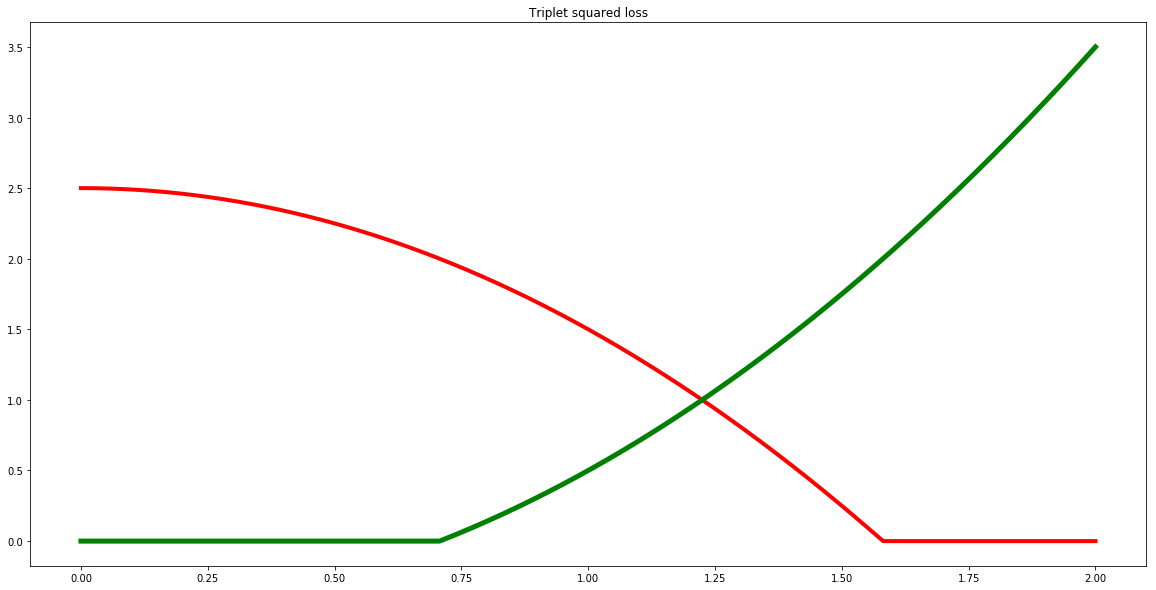

In [8]:
alpha = 1.0

# positive loss
Dan_squared_fixed = 1.5
l_triplet_squared_pos = [max(alpha + han**2 - Dan_squared_fixed, 0) for han in Han]

# negative loss
Dap_squared_fixed = 1.5
l_triplet_squared_neg = [max(alpha + Dap_squared_fixed - han**2 , 0) for han in Han]

plt.figure(figsize=(20,10))
plt.plot(Han, l_triplet_squared_neg, linewidth=4.0, color='red')
plt.plot(Han, l_triplet_squared_pos, linewidth=5.0, color='green')
plt.title('Triplet squared loss')
plt.show()

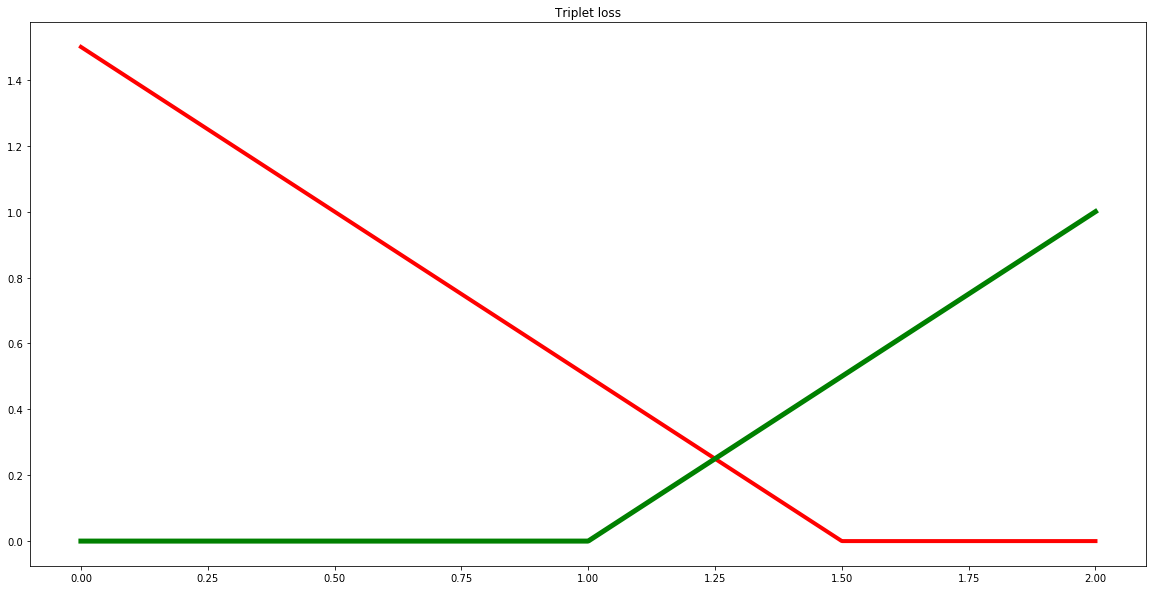

In [9]:
alpha = 0.5

# positive loss
Dan_fixed = 1.5
l_triplet_pos = [max(alpha + han - Dan_fixed, 0) for han in Han]

# negative loss
Dap_fixed = 1.0
l_triplet_neg = [max(alpha + Dap_fixed - han , 0) for han in Han]

plt.figure(figsize=(20,10))
plt.plot(Han, l_triplet_neg, linewidth=4.0, color='red')
plt.plot(Han, l_triplet_pos, linewidth=5.0, color='green')
plt.title('Triplet loss')
plt.show()

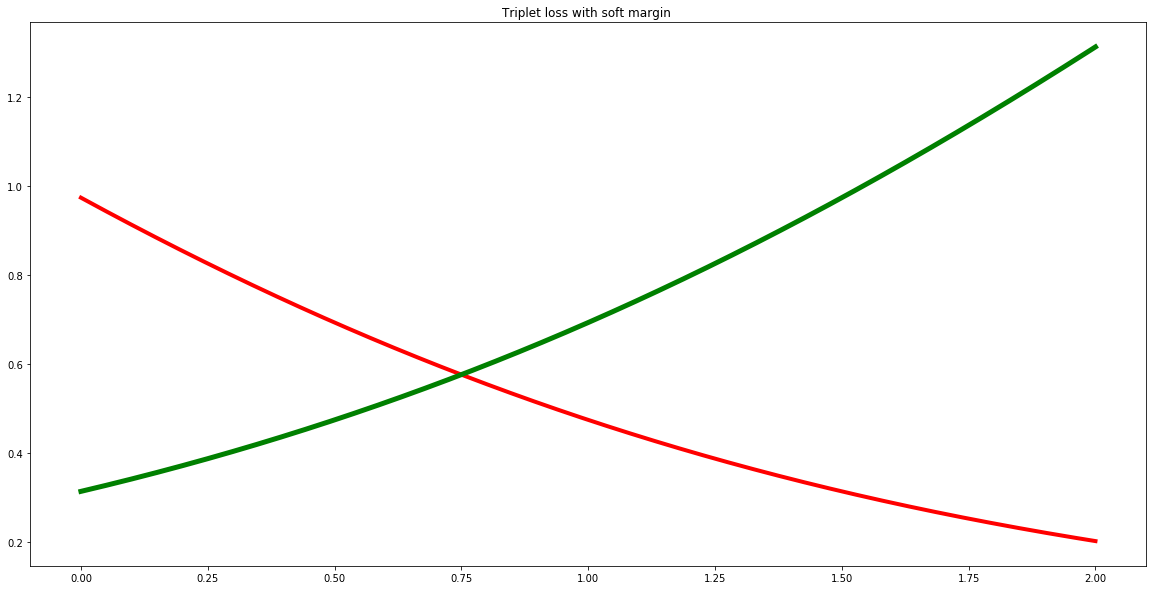

In [10]:
# positive loss
Dan_fixed = 1.0
l_triplet_pos = [np.log(np.exp(han - Dan_fixed) + 1) for han in Han]

# negative loss
Dap_fixed = 0.5
l_triplet_neg = [np.log(np.exp(Dap_fixed - han) + 1) for han in Han]

plt.figure(figsize=(20,10))
plt.plot(Han, l_triplet_neg, linewidth=4.0, color='red')
plt.plot(Han, l_triplet_pos, linewidth=5.0, color='green')
plt.title('Triplet loss with soft margin ')
plt.show()

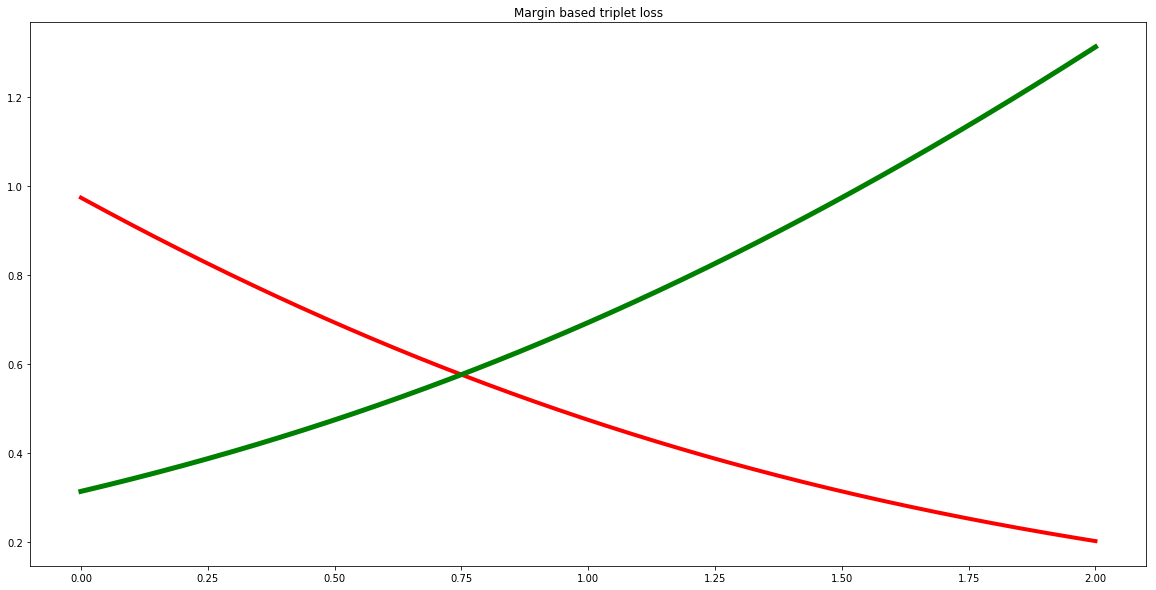

In [11]:
#######################################################################
# DON'T KNOW HOW TO IMPLEMENT!
#######################################################################

# positive loss
Dan_fixed = 1.0
l_triplet_pos = [np.log(np.exp(han - Dan_fixed) + 1) for han in Han]

# negative loss
Dap_fixed = 0.5
l_triplet_neg = [np.log(np.exp(Dap_fixed - han) + 1) for han in Han]

plt.figure(figsize=(20,10))
plt.plot(Han, l_triplet_neg, linewidth=4.0, color='red')
plt.plot(Han, l_triplet_pos, linewidth=5.0, color='green')
plt.title('Margin based triplet loss')
plt.show()